# Machine Learning Engineer Nanodegree
## Model Evaluation & Validation
## Project 1: Predicting Boston Housing Prices

A description of the dataset can be found [here](https://archive.ics.uci.edu/ml/datasets/Housing), which is provided by the **UCI Machine Learning Repository**.

## Getting Started

In [1]:
# Importing a few necessary libraries
import numpy as np
import matplotlib.pyplot as pl
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor

# Make matplotlib show our plots inline (nicely formatted in the notebook)
%matplotlib inline

# Create our client's feature set for which we will be predicting a selling price
CLIENT_FEATURES = [[11.95, 0.00, 18.100, 0, 0.6590, 5.6090, 90.00, 1.385, 24, 680.0, 20.20, 332.09, 12.13]]

# Load the Boston Housing dataset into the city_data variable
city_data = datasets.load_boston()

# Initialize the housing prices and housing features
housing_prices = city_data.target
housing_features = city_data.data

print "Boston Housing dataset loaded successfully!"

/Users/seungjinbaek/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Boston Housing dataset loaded successfully!


# Statistical Analysis and Data Exploration
In this first section of the project, I quickly investigated a few basic statistics about the dataset I am working with. In addition, I looked at the client's feature set in `CLIENT_FEATURES` and see how this particular sample relates to the features of the dataset. 

## Step 1
In the code block below, I used the imported `numpy` library to calculate the requested statistics.

In [2]:
# Number of houses in the dataset
total_houses = np.shape(housing_features)[0]

# Number of features in the dataset
total_features = np.shape(housing_features)[1]

# Minimum housing value in the dataset
minimum_price = np.min(housing_prices)

# Maximum housing value in the dataset
maximum_price = np.max(housing_prices)

# Mean house value of the dataset
mean_price = np.mean(housing_prices)

# Median house value of the dataset
median_price = np.median(housing_prices)

# Standard deviation of housing values of the dataset
std_dev = np.std(housing_prices)

# Show the calculated statistics
print "Boston Housing dataset statistics (in $1000's):\n"
print "Total number of houses:", total_houses
print "Total number of features:", total_features
print "Minimum house price:", minimum_price
print "Maximum house price:", maximum_price
print "Mean house price: {0:.3f}".format(mean_price)
print "Median house price:", median_price
print "Standard deviation of house price: {0:.3f}".format(std_dev)

Boston Housing dataset statistics (in $1000's):

Total number of houses: 506
Total number of features: 13
Minimum house price: 5.0
Maximum house price: 50.0
Mean house price: 22.533
Median house price: 21.2
Standard deviation of house price: 9.188


## Question 1
A description of the Boston Housing dataset can be found [here](https://archive.ics.uci.edu/ml/datasets/Housing), where the different features are shown under **Attribute Information**. The `MEDV` attribute relates to the values stored in the `housing_prices` variable, so we do not consider that a feature of the data.

*Of the features available for each data point, choose three that you feel are significant and give a brief description for each of what they measure.*

**Answer: **

1. (1) CRIM: per capita crime rate by town
2. (6) RM: average number of rooms per dwelling
3. (11) PTRATIO: pupil-teacher ratio by town

## Question 2
*Using your client's feature set `CLIENT_FEATURES`, which values correspond with the features you've chosen above?*  

In [3]:
print CLIENT_FEATURES

[[11.95, 0.0, 18.1, 0, 0.659, 5.609, 90.0, 1.385, 24, 680.0, 20.2, 332.09, 12.13]]


In [4]:
print  ["CRIM","RM","PTRATIO"]
print [CLIENT_FEATURES[0][i] for i in [0,5,10]]

['CRIM', 'RM', 'PTRATIO']
[11.95, 5.609, 20.2]


# Evaluating Model Performance
In this second section of the project, I began to develop the tools necessary for a model to make a prediction. Being able to accurately evaluate each model's performance through the use of these tools helps to greatly reinforce the confidence in prediction alghrithm.

## Step 2
In the code block below, I implement code so that the `shuffle_split_data` function does the following:
- Randomly shuffle the input data `X` and target labels (housing values) `y`.
- Split the data into training and testing subsets, holding 30% of the data for testing.

In [6]:
# Put any import statements you need for this code block here
from sklearn.cross_validation import train_test_split
def shuffle_split_data(X, y):
    """ Shuffles and splits data into 70% training and 30% testing subsets,
        then returns the training and testing subsets. """
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Return the training and testing data subsets
    return X_train, y_train, X_test, y_test


# Test shuffle_split_data
try:
    X_train, y_train, X_test, y_test = shuffle_split_data(housing_features, housing_prices)
    print "Successfully shuffled and split the data!"
except:
    print "Something went wrong with shuffling and splitting the data."

Successfully shuffled and split the data!


## Question 3
*Why do we split the data into training and testing subsets for our model?*

**Answer: **

* Try to avoid overfitting of the model. Test set will be used to generalize the model trained by 'train set.'

* Training sub dataset are usually 70~80% of the data and are used to fit the parameters of a given model, Descision Tree regressos in this project. The parameters found in this 'training' stage will be used against the rest of the data sets that had been left out (testing set) to see if the model will adequately predict a future data sets. This testing set is a proxy to an unknown future data sets. By using a grid search method, the algorithm alternating the test and train sets exhaustively and find the optimal parameter set and by doing this, we could prevent the overfitting from happening.
* If we didn't split the data into training and testing and use all available data for training the model, then the estimated error at the end would be minimal, but it won't necessarily predict well for the future data or unseen data set. It will most likely be overfitting and gives greater error for the future dataset (high variance) as seen in the figure of Question 8 below.

## Step 3
In the code block below, I implement code so that the `performance_metric` function does the following:
- Perform a total error calculation between the true values of the `y` labels `y_true` and the predicted values of the `y` labels `y_predict`.

I refer to an appropriate performance metric for this problem: [the sklearn metrics documentation](http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics) to view a list of available metric functions. 

In [7]:
# Put any import statements you need for this code block here
from sklearn.metrics import mean_squared_error

def performance_metric(y_true, y_predict):
    """ Calculates and returns the total error between true and predicted values
        based on a performance metric chosen by the student. """

    error = mean_squared_error(y_true, y_predict)
    
    return error


# Test performance_metric
try:
    total_error = performance_metric(y_train, y_train)
    print "Successfully performed a metric calculation!"
except:
    print "Something went wrong with performing a metric calculation."

Successfully performed a metric calculation!


## Question 4
*Which performance metric below did you find was most appropriate for predicting housing prices and analyzing the total error. Why?*
- *Accuracy*
- *Precision*
- *Recall*
- *F1 Score*
- *Mean Squared Error (MSE)*
- *Mean Absolute Error (MAE)*

**Answer: **
"Mean Squared Error (MSE)"

- This datasets does not belong to a classification problem, but rather a regression problem. Therefore, squared error would be a good metric for measuring the prediction quality.

- MSE measures the error by assigning larger **weight** when the gaps between predicted and true values become larger than the MAE does because of its nature of 'squared' error values.

## Step 4 (Final Step)
In the code block below, I implement code so that the `fit_model` function does the following:
- Create a scoring function using the same performance metric as in **Step 2**. See the [sklearn `make_scorer` documentation](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Build a GridSearchCV object using `regressor`, `parameters`, and `scoring_function`. See the [sklearn documentation on GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html).

When building the scoring function and GridSearchCV object, I made sure that *I read the parameters documentation thoroughly.* It is not always the case that a default parameter for a function is the appropriate setting for the problem being worked on.

In [8]:
# Put any import statements you need for this code block
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.grid_search import GridSearchCV

def fit_model(X, y):
    """ Tunes a decision tree regressor model using GridSearchCV on the input data X 
        and target labels y and returns this optimal model. """

    # Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # Set up the parameters we wish to tune
    parameters = {'max_depth':(1,2,3,4,5,6,7,8,9,10)}

    # Make an appropriate scoring function
    scoring_function = make_scorer(mean_squared_error, greater_is_better = False)


    # Make the GridSearchCV object
    
    reg = GridSearchCV(regressor, param_grid=parameters, scoring=scoring_function)

    # Fit the learner to the data to obtain the optimal model with tuned parameters
    reg.fit(X, y)

    # Return the optimal model
    return reg.best_estimator_


# Test fit_model on entire dataset
try:
    reg = fit_model(housing_features, housing_prices)
    print "Successfully fit a model!"
except:
    print "Something went wrong with fitting a model."

Successfully fit a model!


### NOTE:
- Since we are trying to minimize the error (loss), `greater_is_better = False` must be used.

## Question 5
*What is the grid search algorithm and when is it applicable?*

**Answer: **

Grid search algorithm systematically tests a selected model with the combination of parameters in order to come up with the optimal sets of parameters. It is applicable when the range of the parameters are known, and a modeler tries to find the best calibration parameters for the selected model (or fit).

## Question 6
*What is cross-validation, and how is it performed on a model? Why would cross-validation be helpful when using grid search?*

**Answer: **

Cross-vaidation is the process where the separation between test and train sets changes while the model parameter are being tuned for optimal fit. The cross validation samples different sets of train and test data each time the model is run so that the parameters fit can be more generalized as they are tested using the grid search method (varying the parameter within the defined ranges).

# Checkpoint!
To prepare the **Analysis** and **Prediction** sections, I initialized the two functions below.

In [9]:
def learning_curves(X_train, y_train, X_test, y_test):
    """ Calculates the performance of several models with varying sizes of training data.
        The learning and testing error rates for each model are then plotted. """
    
    print "Creating learning curve graphs for max_depths of 1, 3, 6, and 10. . ."
    
    # Create the figure window
    fig = pl.figure(figsize=(10,8))

    # We will vary the training set size so that we have 50 different sizes
    sizes = np.rint(np.linspace(1, len(X_train), 50)).astype(int)
    train_err = np.zeros(len(sizes))
    test_err = np.zeros(len(sizes))

    # Create four different models based on max_depth
    for k, depth in enumerate([1,3,6,10]):
        
        for i, s in enumerate(sizes):
            
            # Setup a decision tree regressor so that it learns a tree with max_depth = depth
            regressor = DecisionTreeRegressor(max_depth = depth)
            
            # Fit the learner to the training data
            regressor.fit(X_train[:s], y_train[:s])

            # Find the performance on the training set
            train_err[i] = performance_metric(y_train[:s], regressor.predict(X_train[:s]))
            
            # Find the performance on the testing set
            test_err[i] = performance_metric(y_test, regressor.predict(X_test))

        # Subplot the learning curve graph
        ax = fig.add_subplot(2, 2, k+1)
        ax.plot(sizes, test_err, lw = 2, label = 'Testing Error')
        ax.plot(sizes, train_err, lw = 2, label = 'Training Error')
        ax.legend()
        ax.set_title('max_depth = %s'%(depth))
        ax.set_xlabel('Number of Data Points in Training Set')
        ax.set_ylabel('Total Error')
        ax.set_xlim([0, len(X_train)])
    
    # Visual aesthetics
    fig.suptitle('Decision Tree Regressor Learning Performances', fontsize=18, y=1.03)
    fig.tight_layout()
    fig.show()

In [10]:
def model_complexity(X_train, y_train, X_test, y_test):
    """ Calculates the performance of the model as model complexity increases.
        The learning and testing errors rates are then plotted. """
    
    print "Creating a model complexity graph. . . "

    # We will vary the max_depth of a decision tree model from 1 to 14
    max_depth = np.arange(1, 14)
    train_err = np.zeros(len(max_depth))
    test_err = np.zeros(len(max_depth))

    for i, d in enumerate(max_depth):
        # Setup a Decision Tree Regressor so that it learns a tree with depth d
        regressor = DecisionTreeRegressor(max_depth = d)

        # Fit the learner to the training data
        regressor.fit(X_train, y_train)

        # Find the performance on the training set
        train_err[i] = performance_metric(y_train, regressor.predict(X_train))

        # Find the performance on the testing set
        test_err[i] = performance_metric(y_test, regressor.predict(X_test))

    # Plot the model complexity graph
    pl.figure(figsize=(7, 5))
    pl.title('Decision Tree Regressor Complexity Performance')
    pl.plot(max_depth, test_err, lw=2, label = 'Testing Error')
    pl.plot(max_depth, train_err, lw=2, label = 'Training Error')
    pl.legend()
    pl.xlabel('Maximum Depth')
    pl.ylabel('Total Error')
    pl.show()

# Analyzing Model Performance
In this third section of the project, I looked at several models' learning and testing error rates on various subsets of training data. Additionally, I investigated one particular algorithm with an increasing `max_depth` parameter on the full training set to observe how model complexity affects learning and testing errors. Graphing the model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

Creating learning curve graphs for max_depths of 1, 3, 6, and 10. . .


/Users/seungjinbaek/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


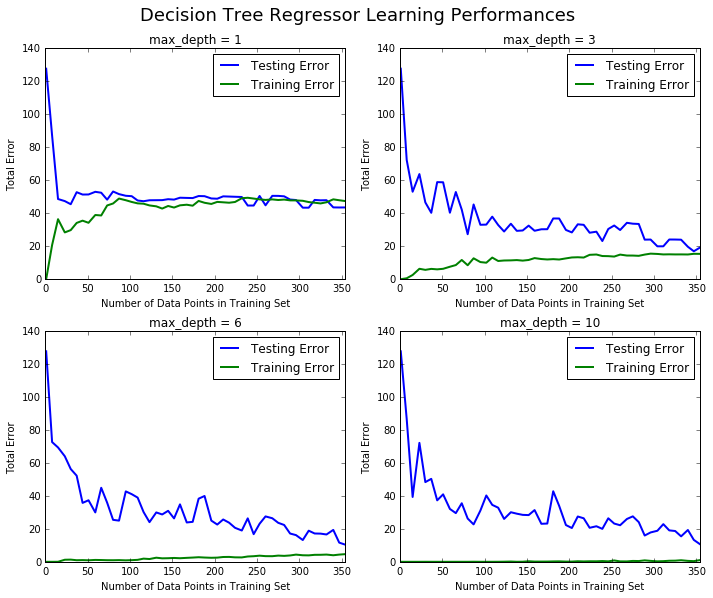

In [11]:
learning_curves(X_train, y_train, X_test, y_test)

## Question 7
*Choose one of the learning curve graphs that are created above. What is the max depth for the chosen model? As the size of the training set increases, what happens to the training error? What happens to the testing error?*

**Answer: **

* I chose max_depth = 10. As the size of the training set increases, training error stays very low while the testing error stays high.
* As the size of the training set increases, the training error stays low with little bit of rising as number of data points increases (x-axis). And the testing error initially stays high, but shows a clear downward trend as more data points are included in the training, which make the model more generalized. 
* The errors from testing and training, as the number of data points increases, will converge to a certain level. All four figures above show the same trend that two error curves converge at different levels indicating the more max_depth the less the final error level will be. Therefore having more data for max_dapth = 10 case will have much lower error than the three other cases shown above. 

## Question 8
*Look at the learning curve graphs for the model with a max depth of 1 and a max depth of 10. When the model is using the full training set, does it suffer from high bias or high variance when the max depth is 1? What about when the max depth is 10?*

**Answer: **

* The reason max depth = 1 being high bias is that the errors from both train/test sets stay high at about the same level implying that adding more datasets would not improve the model prediction. This tells me that more features might be needed to fit the data or more branching would be needed in growing the tree; clearly underfitting.|
* max depth = 10 being high variance is because while the training error stays low, the testing error still is higher and showing a considerable gaps between the two errors. This is generally overfitting situation, but having the testing error show falling trend indicates that these two errors curve will eventually converge at a certain level with more data sets and we can call it a good fit.

Creating a model complexity graph. . . 


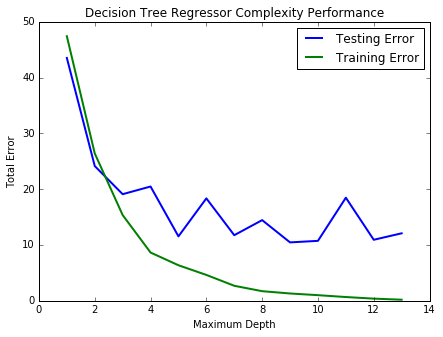

In [29]:
model_complexity(X_train, y_train, X_test, y_test)

## Question 9
*From the model complexity graph above, describe the training and testing errors as the max depth increases. Based on your interpretation of the graph, which max depth results in a model that best generalizes the dataset? Why?*

**Answer: **

* I would choose max_depth = 6. Max depth larger than this value does not provide any improvement in reducing errors in testing sets.
* This experiments tested how the model fit change as we increase the maximum depth in growing trees (in descision tree algorithm) with full data sets. The training error would obviously decrease as the branching is fine-tuned based on the training data itself, but the testing error does NOT show the same trend as more and more branches are growing (i.e. increasing maximum depth) high variance error kicks in. The higher the maximum depth becomes, the less generalized the model will be.
* For the testing error, as the number of maximum depth increases, it keeps decreasing up to a certain point and after that point the error goes back up. This is the case where the variance error takes effect. The point of minimum value for the testing error would be the optimal number of maximum depth for this model. 

# Model Prediction
In this final section of the project, I made a prediction on the client's feature set using an optimized model from `fit_model`. When applying grid search along with cross-validation to optimize the model, it would typically be performed and validated on a training set and subsequently evaluated on a **dedicated test set**. In this project, the optimization below is performed on the *entire dataset* (as opposed to the training set you made above) due to the many outliers in the data. Using the entire dataset for training provides for a less volatile prediction at the expense of not testing your model's performance. 


## Question 10
*Using grid search on the entire dataset, what is the optimal `max_depth` parameter for your model? How does this result compare to your intial intuition?*  
**Hint: ** Run the code block below to see the max depth produced by your optimized model.

In [30]:
print "Final model has an optimal max_depth parameter of", reg.get_params()['max_depth']

Final model has an optimal max_depth parameter of 7


**Answer: **

* After I fixed the scoring method, now I see various values for max_depth parameter. I now see 8, but it flucuates between 4 and 8, I observed. This would somewhat matches with my initial observation of max_depth being 6. 

## Question 11
*With your parameter-tuned model, what is the best selling price for your client's home? How does this selling price compare to the basic statistics you calculated on the dataset?*  

**Hint: ** Run the code block below to have your parameter-tuned model make a prediction on the client's home.

In [31]:
sale_price = reg.predict(CLIENT_FEATURES)
print "Predicted value of client's home: {0:.3f}".format(sale_price[0])

Predicted value of client's home: 19.997


**Answer: **
* 19.934 = $19,934
* The prediected values are one of these: [21.36, 20.766, 18.817] I realized that repeated execution of the code blocks generates different values everytime and noticed when the optimal max_depth is high (max_depth = 8) then the predected house value turns out to be low. When the optimal was max_depth = 4, then the predicted values were high.
* From the basic statistics, the mean house price is 22.533 and the median house price is 21.2. The prediected values from the descision tree regressor are one of these: [21.63, 21.36, 20.766, 20.72, 19.997, 18.817]: please see below for mean and median for these values. It seems the client's house will sell a little lower than the majority of houses whose data are available.

In [32]:
print "Mean = ", np.mean([21.63, 21.36, 20.766, 20.72, 19.997, 18.817])
print "Median = ", np.median([21.63, 21.36, 20.766, 20.72, 19.997, 18.817])

Mean =  20.5483333333
Median =  20.743


## Question 12 (Final Question):
*In a few sentences, discuss whether you would use this model or not to predict the selling price of future clients' homes in the Greater Boston area.*

**Answer: **

I probably wouldn't use this model because 
1. the size of the test sets are small.
2. the data are outdated so they can't be used for 'future' selling price prediction.